In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the expression data and traits data
expression_data = pd.read_csv('HW03_expression.csv', index_col=0)
traits_data = pd.read_csv('HW03_traits.csv', index_col=0)

# Ensure that the expression data and traits data have the same samples in the same order
common_samples = expression_data.columns.intersection(traits_data.index)
expression_data = expression_data[common_samples]
traits_data = traits_data.loc[common_samples]

# Load the module assignments (replace 'module_assignments.csv' with your actual file)
module_assignments = pd.read_csv('module_assignments.csv')
module_assignments = module_assignments.set_index('Gene')

# Filter the expression data to include only genes present in the module assignments
expression_data = expression_data.loc[module_assignments.index]

# Calculate the first eigengene for each module
module_eigengenes = {}
for module in module_assignments['Module'].unique():
    module_genes = expression_data.loc[module_assignments['Module'] == module]
    
    # Impute missing values before PCA
    imputer = SimpleImputer(strategy='mean')
    imputed_module_genes = imputer.fit_transform(module_genes.T)
    
    pca = PCA(n_components=1)
    pca.fit(imputed_module_genes)
    # Ensure the eigengene matches the number of common samples
    module_eigengenes[module] = pca.components_[0][:len(common_samples)]

# Convert the module eigengenes to a DataFrame
module_eigengenes_df = pd.DataFrame(module_eigengenes, index=common_samples)

# Associate each module eigengene with the two traits
trait_associations = {}
for trait in traits_data.columns:
    correlations = module_eigengenes_df.corrwith(traits_data[trait])
    trait_associations[trait] = correlations

# Convert the trait associations to a DataFrame
trait_associations_df = pd.DataFrame(trait_associations)

# Save the associations between module eigengenes and traits to a CSV file in the root directory
trait_associations_df.to_csv('module_trait_associations.csv')

# Print a message to indicate that the file has been saved
print('The associations between module eigengenes and traits have been saved to module_trait_associations.csv')


The associations between module eigengenes and traits have been saved to module_trait_associations.csv


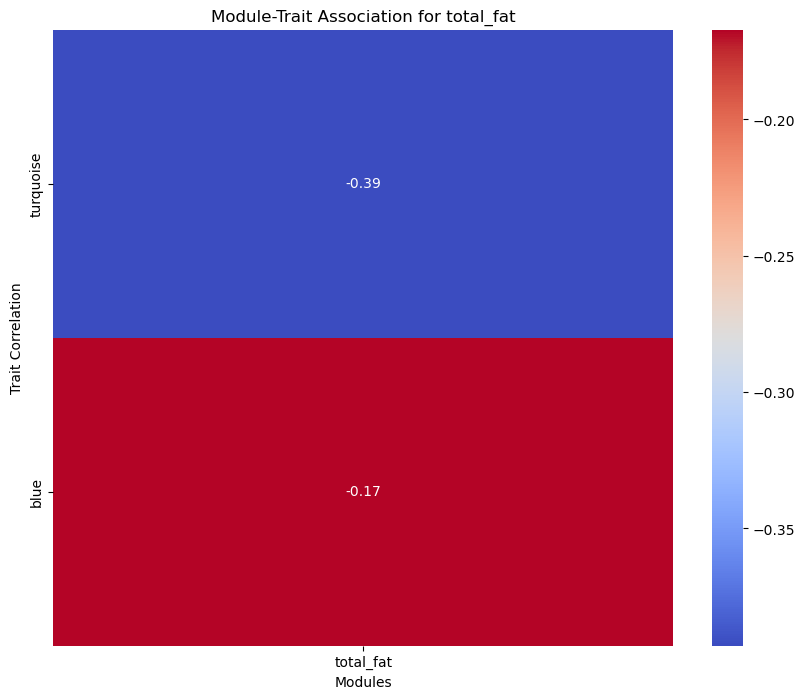

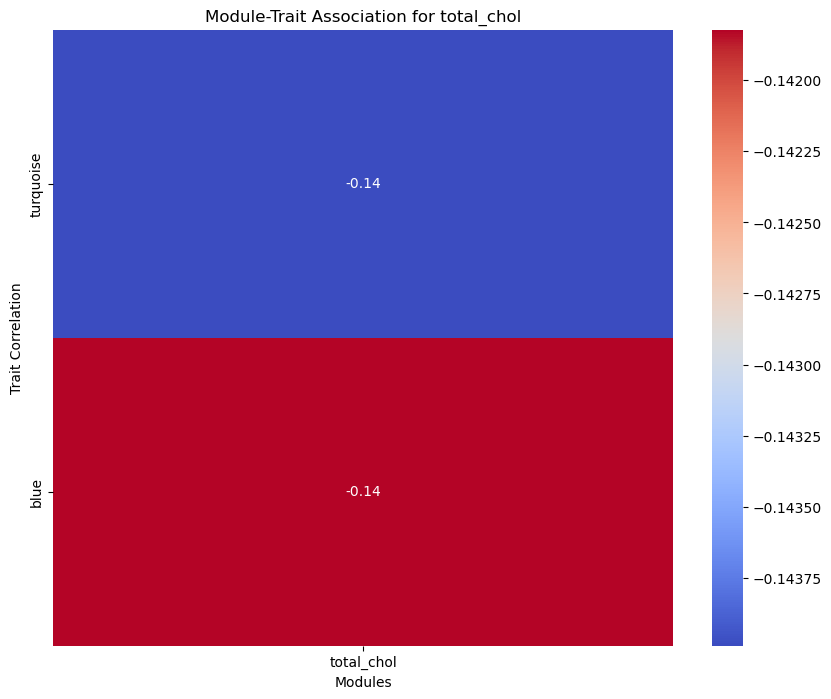

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the expression data and traits data
expression_data = pd.read_csv('filtered_expression_data1.csv', index_col=0)
traits_data = pd.read_csv('HW03_Traits.csv', index_col=0)

# Ensure that the expression data and traits data have the same samples in the same order
common_samples = expression_data.columns.intersection(traits_data.index)
expression_data = expression_data[common_samples]
traits_data = traits_data.loc[common_samples]

# Load the module assignments
module_assignments = pd.read_csv('module_assignments.csv')
module_assignments = module_assignments.set_index('Gene')

# Filter the module assignments to include only genes present in the expression data
module_assignments = module_assignments.loc[module_assignments.index.intersection(expression_data.index)]

# Filter the expression data to include only genes present in the module assignments
expression_data = expression_data.loc[module_assignments.index]

# Calculate the first eigengene for each module
module_eigengenes = {}
for module in module_assignments['Module'].unique():
    module_genes = expression_data.loc[module_assignments['Module'] == module]
    imputer = SimpleImputer(strategy='mean')
    imputed_module_genes = imputer.fit_transform(module_genes.T)
    pca = PCA(n_components=1)
    pca.fit(imputed_module_genes)
    # Ensure the eigengene is a single value per sample
    module_eigengenes[module] = pca.transform(imputed_module_genes).flatten()

# Convert the module eigengenes to a DataFrame
module_eigengenes_df = pd.DataFrame(module_eigengenes, index=common_samples)

# Associate each module eigengene with the two traits
trait_associations = {}
for trait in traits_data.columns:
    correlations = module_eigengenes_df.corrwith(traits_data[trait])
    trait_associations[trait] = correlations

# Convert the trait associations to a DataFrame
trait_associations_df = pd.DataFrame(trait_associations)

# Plot a heatmap for each trait
for trait in traits_data.columns:
    plt.figure(figsize=(10, 8))
    sns.heatmap(trait_associations_df[[trait]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Module-Trait Association for {trait}')
    plt.xlabel('Modules')
    plt.ylabel('Trait Correlation')
    plt.show()
